<h1>Competition Description</h1>

<p align="center">
  <img src="https://storage.googleapis.com/kaggle-media/competitions/House%20Prices/kaggle_5407_media_housesbanner.png" />
</p>

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Data fields Description

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

### Importing Libraries

In [1]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import xgboost as xg
import statsmodels.api as sm #regression
from statsmodels.formula.api import ols #Anova & Regression
import statsmodels.stats.multicomp as mc
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_log_error, make_scorer

C:\Users\hychh\AppData\Local\Temp\ipykernel_2348\704967497.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("train.csv")
df_copy = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
for column in df.columns.to_list():
    if df[column].isnull().sum():
        print(f"{column} | {df[column].isna().sum()} | {df[column].dtype}")

LotFrontage | 259 | float64
Alley | 1369 | object
MasVnrType | 872 | object
MasVnrArea | 8 | float64
BsmtQual | 37 | object
BsmtCond | 37 | object
BsmtExposure | 38 | object
BsmtFinType1 | 37 | object
BsmtFinType2 | 38 | object
Electrical | 1 | object
FireplaceQu | 690 | object
GarageType | 81 | object
GarageYrBlt | 81 | float64
GarageFinish | 81 | object
GarageQual | 81 | object
GarageCond | 81 | object
PoolQC | 1453 | object
Fence | 1179 | object
MiscFeature | 1406 | object


(array([1.077e+03, 2.190e+02, 9.400e+01, 2.900e+01, 1.900e+01, 6.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([   0.,  160.,  320.,  480.,  640.,  800.,  960., 1120., 1280.,
        1440., 1600.]),
 <BarContainer object of 10 artists>)

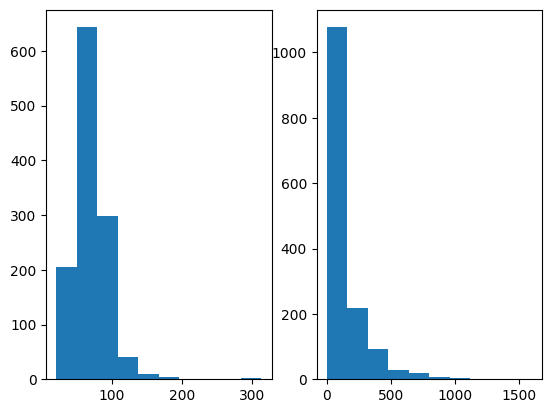

In [6]:
fig , ax = plt.subplots(nrows=1,ncols=2)

ax[0].hist(df['LotFrontage'])
ax[1].hist(df['MasVnrArea'])

In [7]:
def clean_handle_null(df):
    for column in df.columns.to_list():
        if df[column].dtype == object:
            df[column] = df[column].astype('category') 
            df[column] = df[column].cat.codes
    df.fillna(-1,inplace=True)
    return df

In [8]:
def replace_numbers_with_words(df):
    number_to_word = {
        '0': 'zero', '1': 'one', '2': 'two', '3': 'three', '4': 'four',
        '5': 'five', '6': 'six', '7': 'seven', '8': 'eight', '9': 'nine'
    }

    new_columns = [''.join([number_to_word.get(char, char) for char in col]) for col in df.columns]
    new_columns = [re.sub(r'[^a-zA-Z0-9_]', '_', a.strip().lower()) for a in new_columns]

    df.columns = new_columns
    return df

In [9]:
df = pd.get_dummies(df,dtype=int)
df.fillna(-1,inplace=True)

In [10]:
for column in df.columns.to_list():
    if df[column].isnull().sum():
        print(f"{column} | {df[column].isna().sum()} | {df[column].dtype}")

In [11]:
df.columns = replace_numbers_with_words(df).columns

In [12]:
eq = 'saleprice~'+'+'.join(df.drop(['saleprice','id'],axis=1).columns)
fit1 = ols(eq,data=df).fit()
p_value = sm.stats.anova_lm(fit1,typ=2)
sigcols = p_value[p_value['PR(>F)']<0.05].sort_values(by='PR(>F)', ascending=True).index

In [13]:
df = df[['saleprice','id']+sigcols.to_list()]
df.head()

,saleprice,id,roofmatl_clytile,conditiontwo_posn,overallqual,twondflrsf,overallcond,lotarea,totalbsmtsf,bsmtfinsfone,...,roofmatl_compshg,roofstyle_shed,garagecond_ex,neighborhood_crawfor,lowqualfinsf,poolqc_ex,roofmatl_tar_grv,neighborhood_names,bsmtcond_fa,bsmtcond_gd
0,208500,1,0,0,7,854,5,8450,856,706,...,1,0,0,0,0,0,0,0,0,0
1,181500,2,0,0,6,0,8,9600,1262,978,...,1,0,0,0,0,0,0,0,0,0
2,223500,3,0,0,7,866,5,11250,920,486,...,1,0,0,0,0,0,0,0,0,0
3,140000,4,0,0,7,756,5,9550,756,216,...,1,0,0,1,0,0,0,0,0,1
4,250000,5,0,0,8,1053,5,14260,1145,655,...,1,0,0,0,0,0,0,0,0,0


In [14]:
X = df.drop('saleprice',axis=1)
y = df['saleprice']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [16]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [17]:
rfr.score(X_test,y_test)

0.8813018290504482

In [18]:
y_pred = rfr.predict(X_test)

In [19]:
root_mean_squared_log_error(y_test,y_pred)

0.15118865665587075

In [20]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [21]:
gbr.score(X_test,y_test)

0.8905004237171267

In [22]:
y_pred = gbr.predict(X_test)
root_mean_squared_log_error(y_test,y_pred)

0.13920929949812322

In [23]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [24]:
df_test = pd.get_dummies(df_test,dtype=int)
df_test.fillna(-1,inplace=True)

In [25]:
df_test.columns = replace_numbers_with_words(df_test).columns

In [26]:
sigcols = [col for col in sigcols if col in df_test.columns]
df_test = df_test[['id'] + sigcols]

In [28]:

missing_features = ['garagequal_ex', 'poolqc_fa', 'roofmatl_clytile', 'roofmatl_membran', 'roofmatl_metal']
for feature in missing_features:
    df_test[feature] = 0
df_test = df_test[X_train.columns]
test_predict = gbr.predict(df_test)

In [29]:
submission = pd.DataFrame({'Id':df_test['id'],'saleprice':test_predict})
submission.to_csv("submission.csv",index=False)

In [30]:
from joblib import dump, load

dump(gbr, 'gbr.joblib')

['gbr.joblib']